In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [173]:
df = pd.read_csv("https://raw.githubusercontent.com/Nyker510/baseball_dataset/master/battingdata2015.csv",
                index_col=False)

In [174]:
df.head()

,Unnamed: 0,Team,背番号,選手名,打率,試合,打席数,打数,安打,本塁打,...,四球,死球,三振,犠打,併殺打,長打率,出塁率,OPS,RC27,XR27
0,0,広,33,菊池 涼介,0.256,142,640,558,143,8,...,29,2,91,49,7,0.346,0.294,0.640,3.28,3.25
1,1,広,9,丸 佳浩,0.250,142,629,527,132,19,...,93,1,142,4,4,0.416,0.362,0.777,5.60,5.63
2,2,広,63,田中 広輔,0.275,140,587,541,149,8,...,33,7,104,5,8,0.414,0.325,0.739,4.66,4.47
3,3,広,28,新井 貴浩,0.275,124,476,422,116,7,...,48,2,73,0,15,0.386,0.349,0.735,4.69,4.63
4,4,広,6,梵 英心,0.237,96,332,283,67,6,...,36,1,49,10,6,0.360,0.323,0.683,3.89,3.93


In [175]:
df = df.drop("Unnamed: 0",axis=1)

In [176]:
df = df.dropna()

In [177]:
df.head()

,Team,背番号,選手名,打率,試合,打席数,打数,安打,本塁打,打点,...,四球,死球,三振,犠打,併殺打,長打率,出塁率,OPS,RC27,XR27
0,広,33,菊池 涼介,0.256,142,640,558,143,8,32,...,29,2,91,49,7,0.346,0.294,0.640,3.28,3.25
1,広,9,丸 佳浩,0.250,142,629,527,132,19,63,...,93,1,142,4,4,0.416,0.362,0.777,5.60,5.63
2,広,63,田中 広輔,0.275,140,587,541,149,8,45,...,33,7,104,5,8,0.414,0.325,0.739,4.66,4.47
3,広,28,新井 貴浩,0.275,124,476,422,116,7,57,...,48,2,73,0,15,0.386,0.349,0.735,4.69,4.63
4,広,6,梵 英心,0.237,96,332,283,67,6,27,...,36,1,49,10,6,0.360,0.323,0.683,3.89,3.93


In [178]:
df_player = pd.read_csv("https://raw.githubusercontent.com/Nyker510/baseball_dataset/master/player_info_table.csv")

In [179]:
df_player = df_player.drop("Unnamed: 0",axis=1)

In [180]:
df_merged = pd.merge(df,df_player,on="選手名")

In [181]:
import xgboost as xgb

In [182]:
df_merged[df_merged["年俸(推定)"] == "-"] = 0

In [183]:
df_merged = df_merged[df_merged["年俸(推定)"] > 0]

In [184]:
df_merged["年俸(推定)"] = df_merged["年俸(推定)"].astype("int")

In [188]:
df_x = df_merged.dropna()

In [189]:
df_x["RC27"][df_x["RC27"] == '\xe2\x88\x9e'] = np.NAN

/Users/NYer510/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [190]:
df_x["RC27"] = df_x["RC27"].dropna().astype("float")

In [191]:
df_x  =df_x.drop(["選手名","背番号","Team_y","生年月日","XR27","No."],axis=1)
pd.get_dummies(df_x).columns

Index([u'打率', u'試合', u'打席数', u'打数', u'安打', u'本塁打', u'打点', u'盗塁', u'四球', u'死球',
       u'三振', u'犠打', u'併殺打', u'長打率', u'出塁率', u'OPS', u'RC27', u'年齢', u'年数',
       u'身長', u'体重', u'年俸(推定)', u'Team_x_ヤ', u'Team_x_中', u'Team_x_巨',
       u'Team_x_広', u'Team_x_横', u'Team_x_阪', u'守備_内野手', u'守備_外野手', u'守備_投手',
       u'守備_捕手', u'血液型_A', u'血液型_AB', u'血液型_B', u'血液型_O', u'血液型_不明',
       u'出身地_アメリカ', u'出身地_アンティル', u'出身地_オーストラリア', u'出身地_キューバ', u'出身地_ドミニカ共和国',
       u'出身地_ブラジル', u'出身地_ベネズエラ', u'出身地_三重', u'出身地_京都', u'出身地_佐賀', u'出身地_兵庫',
       u'出身地_北海道', u'出身地_千葉', u'出身地_和歌山', u'出身地_埼玉', u'出身地_大阪', u'出身地_奈良',
       u'出身地_宮城', u'出身地_宮崎', u'出身地_富山', u'出身地_山口', u'出身地_山梨', u'出身地_岐阜',
       u'出身地_岡山', u'出身地_岩手', u'出身地_島根', u'出身地_広島', u'出身地_徳島', u'出身地_愛知',
       u'出身地_新潟', u'出身地_東京', u'出身地_栃木', u'出身地_沖縄', u'出身地_熊本', u'出身地_石川',
       u'出身地_神奈川', u'出身地_福井', u'出身地_福岡', u'出身地_福島', u'出身地_群馬', u'出身地_茨城',
       u'出身地_長崎', u'出身地_青森', u'出身地_静岡', u'出身地_鹿児島', u'投_右', u'投_左', u'打_両',
       u'打_右', u'打_左'],
  

In [203]:
df_x_dummies = pd.get_dummies(df_x)

In [204]:
df_x_dummies = df_x_dummies.dropna()
target = df_x_dummies["年俸(推定)"]
df_x_dummies = df_x_dummies.drop("年俸(推定)",axis=1)

In [205]:
for i in df_x_dummies.columns:
    print i

打率
試合
打席数
打数
安打
本塁打
打点
盗塁
四球
死球
三振
犠打
併殺打
長打率
出塁率
OPS
RC27
年齢
年数
身長
体重
Team_x_ヤ
Team_x_中
Team_x_巨
Team_x_広
Team_x_横
Team_x_阪
守備_内野手
守備_外野手
守備_投手
守備_捕手
血液型_A
血液型_AB
血液型_B
血液型_O
血液型_不明
出身地_アメリカ
出身地_アンティル
出身地_オーストラリア
出身地_キューバ
出身地_ドミニカ共和国
出身地_ブラジル
出身地_ベネズエラ
出身地_三重
出身地_京都
出身地_佐賀
出身地_兵庫
出身地_北海道
出身地_千葉
出身地_和歌山
出身地_埼玉
出身地_大阪
出身地_奈良
出身地_宮城
出身地_宮崎
出身地_富山
出身地_山口
出身地_山梨
出身地_岐阜
出身地_岡山
出身地_岩手
出身地_島根
出身地_広島
出身地_徳島
出身地_愛知
出身地_新潟
出身地_東京
出身地_栃木
出身地_沖縄
出身地_熊本
出身地_石川
出身地_神奈川
出身地_福井
出身地_福岡
出身地_福島
出身地_群馬
出身地_茨城
出身地_長崎
出身地_青森
出身地_静岡
出身地_鹿児島
投_右
投_左
打_両
打_右
打_左


In [288]:
perm = np.random.permutation(len(df_x_dummies))
train_indx = perm[:110]
test_indx = perm[110:]
train_dm = xgb.DMatrix(data=df_x_dummies.values[train_indx],label=target.values[train_indx])
test_dm = xgb.DMatrix(data=df_x_dummies.values[test_indx],label=target.values[test_indx])

In [289]:
params = {
         'eta': .1,}
cv = xgb.cv(params,train_dm,num_boost_round=100)

In [290]:
cv.head(9)

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,6159.216471,1567.119669,6112.529460,766.815910
1,5869.157227,1642.286903,5669.528320,713.526733
2,5623.042643,1646.517037,5268.581217,671.085369
3,5442.547933,1670.479022,4904.246338,630.005733
4,5323.516276,1660.353314,4567.095215,594.161633
5,5207.586588,1661.400435,4236.634766,549.097263
6,5149.927165,1638.298969,3948.701091,520.799112
7,5108.559896,1617.500161,3682.481771,495.000801
8,5097.689372,1582.125833,3438.695231,469.337968


In [291]:
bst = xgb.train(params,train_dm,num_boost_round=cv.sort("test-rmse-mean").index[0])

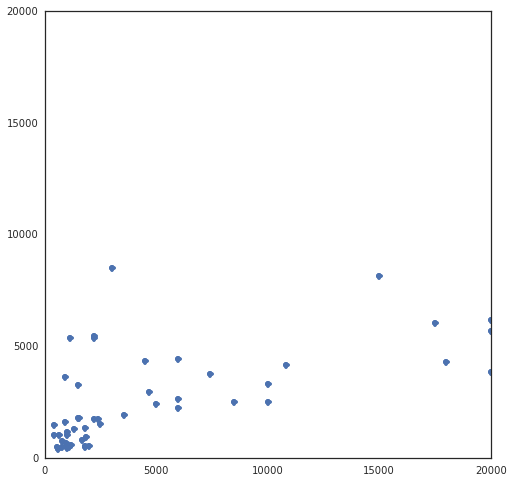

In [292]:

plt.figure(figsize=(8,8))
# plt.plot(train_dm.get_label(),bst.predict(train_dm),"o")
plt.plot(test_dm.get_label(),bst.predict(test_dm),"o")
plt.xlim(0,20000)
plt.ylim(0,20000)
plt.savefig("bb_regression.png")

In [293]:
import seaborn as sns

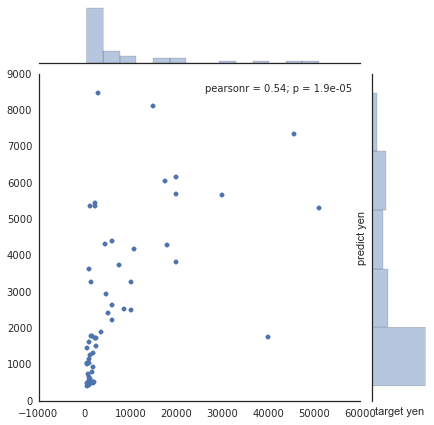

In [294]:
sns.jointplot(test_dm.get_label(),bst.predict(test_dm))
plt.xlabel("target yen")
plt.ylabel("predict yen")

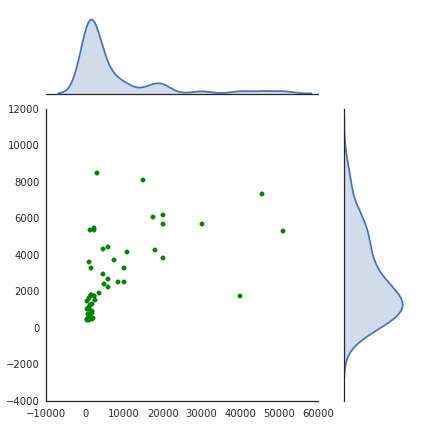

In [295]:
sns.set_style("white")
grid = sns.JointGrid(test_dm.get_label(),bst.predict(test_dm), space=0, size=6, ratio=3)

grid.plot_joint(plt.scatter, color="g")

grid = grid.plot_marginals(sns.kdeplot,shade=True)
plt.tight_layout()
plt.savefig("bb_reg.png")

In [296]:
pred = bst.predict(test_dm)

In [310]:
error = pred - test_dm.get_label()
price = test_dm.get_label()[error.argmax()]

In [316]:
max_e_indx = np.abs(error).argmax()

In [317]:
pred[max_e_indx]

5309.4614

In [318]:
test_dm.get_label()[max_e_indx]

51000.0

In [319]:
df_x_dummies.ix[test_indx[max_e_indx]]

打率            0.242
試合          111.000
打席数         419.000
打数          343.000
安打           83.000
本塁打          15.000
打点           47.000
盗塁            0.000
四球           64.000
死球            8.000
三振           84.000
犠打            0.000
併殺打           9.000
長打率           0.414
出塁率           0.370
OPS           0.784
RC27          5.510
年齢           36.000
年数           15.000
身長          180.000
体重           97.000
Team_x_ヤ      0.000
Team_x_中      0.000
Team_x_巨      1.000
Team_x_広      0.000
Team_x_横      0.000
Team_x_阪      0.000
守備_内野手        1.000
守備_外野手        0.000
守備_投手         0.000
             ...   
出身地_山口        0.000
出身地_山梨        0.000
出身地_岐阜        0.000
出身地_岡山        0.000
出身地_岩手        0.000
出身地_島根        0.000
出身地_広島        0.000
出身地_徳島        0.000
出身地_愛知        0.000
出身地_新潟        0.000
出身地_東京        0.000
出身地_栃木        0.000
出身地_沖縄        0.000
出身地_熊本        0.000
出身地_石川        0.000
出身地_神奈川       0.000
出身地_福井        0.000
出身地_福岡        0.000
出身地_福島        0.000


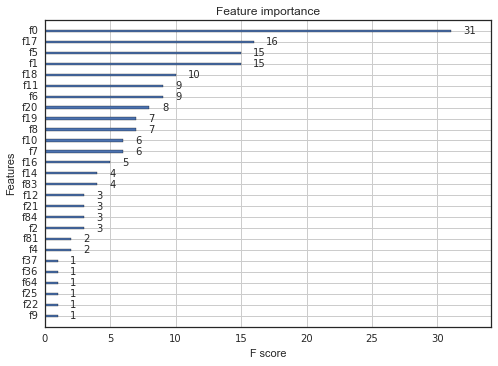

In [320]:
xgb.plot_importance(bst)

In [321]:
df_merged["salary"] = df_merged["年俸(推定)"]

(array([  4.,  31.,  24.,  17.,  13.,   8.,   6.,   8.,   5.,   7.,   1.,
          1.,   5.,   1.,   1.,   1.,   1.,   2.,   3.,   5.]),
 array([     0.,    500.,   1000.,   1500.,   2000.,   2500.,   3000.,
          3500.,   4000.,   4500.,   5000.,   5500.,   6000.,   6500.,
          7000.,   7500.,   8000.,   8500.,   9000.,   9500.,  10000.]),
 <a list of 20 Patch objects>)

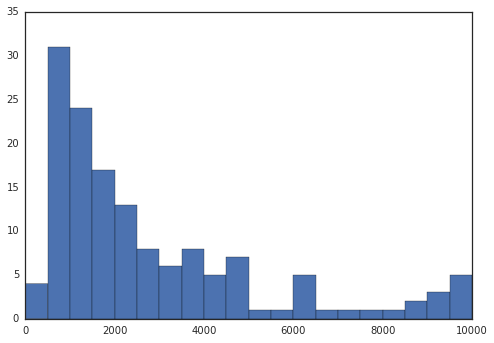

In [330]:
plt.hist(df_merged.salary,bins=np.linspace(0,10000,21))